In [106]:
import skimage as ski
from skimage import color,io,filters,measure
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [107]:
%matplotlib inline

In [108]:
numberOfImgs = 4
def show(imgs,CMAP = None):
    cols = 2
    rows = 2
    fig, ax = plt.subplots(rows,cols ,figsize = (10,10),constrained_layout=True)
    fig.set_constrained_layout_pads(w_pad=0.02, h_pad=0.02,
            hspace=0., wspace=0.)
    [axi.set_axis_off() for axi in ax.ravel()]
    for i in range(rows):
        for j in range(cols):
            ax[i][j].imshow(imgs[i*cols+j],CMAP)

In [109]:
img = [io.imread(str(33+i)+".jpg") for i in range(numberOfImgs)]
#img = color.rgba2rgb(img)
#img = ski.img_as_ubyte(img)


In [110]:

imgG = [color.rgb2gray(i) for i in img]
#imgG = [i[:,:,1] for i in img]
#imgG = color.rgb2hsv(img)[:,:,2]
#show(imgG,"gray")
#print(imgG)

0.31039890234700385
po  0.07591600314526416
0.33626030543147944
po  0.19848186979820154
0.495006395688657
po  0.07135178756904194
0.44642210847891034
po  0.07150436700440078


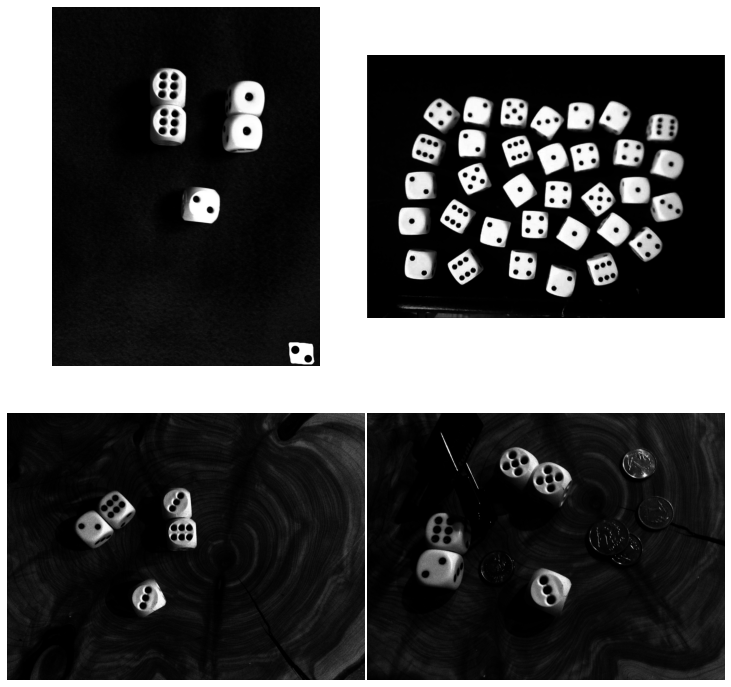

In [111]:
def IncreaseContrast(image):
    #image = image**0.7
    #image = image**3
    #image = np.clip(image -0.1 , 0,1)
    brightness =np.mean(image) 
    print(brightness)
    image = image**(brightness*9)
    print("po " , np.mean(image))
    #image = image**0.5
    #image = ski.filters.sobel(image)
    return image
imgC = [IncreaseContrast(i) for i in imgG]
#imgLinia = [cv2.line(i , (0,0),(250,250),1 , 10) for i in imgC]
#show(imgLinia , "gray")
show(imgC,"gray")

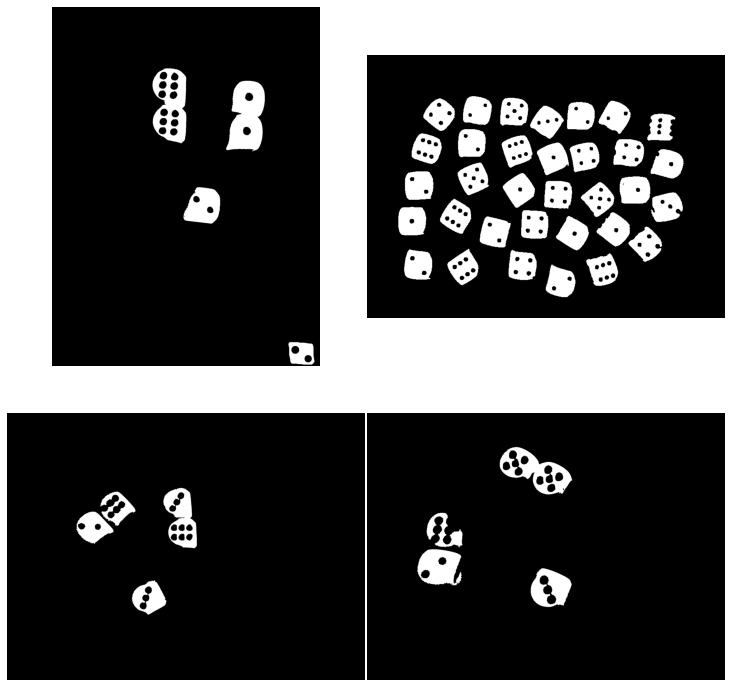

In [112]:
def MakeThresholded(img):
    threshold = filters.threshold_otsu(img)
    imgN = img > threshold
    imgN = ski.morphology.remove_small_objects(imgN , imgN.size//1000)
    neigh = np.ones((5,5))
    #imgN = ski.morphology.binary_erosion(imgN,neigh)
    #imgN = ski.morphology.binary_erosion(imgN,neigh)
    #imgN = ski.morphology.binary_erosion(imgN)

    imgN = ski.morphology.binary_dilation(imgN)
    #imgT = ski.morphology.binary_dilation(imgT)

    return imgN
imgT = [MakeThresholded(i) for i in imgC]

show(imgT,"gray")


4
33
4
4


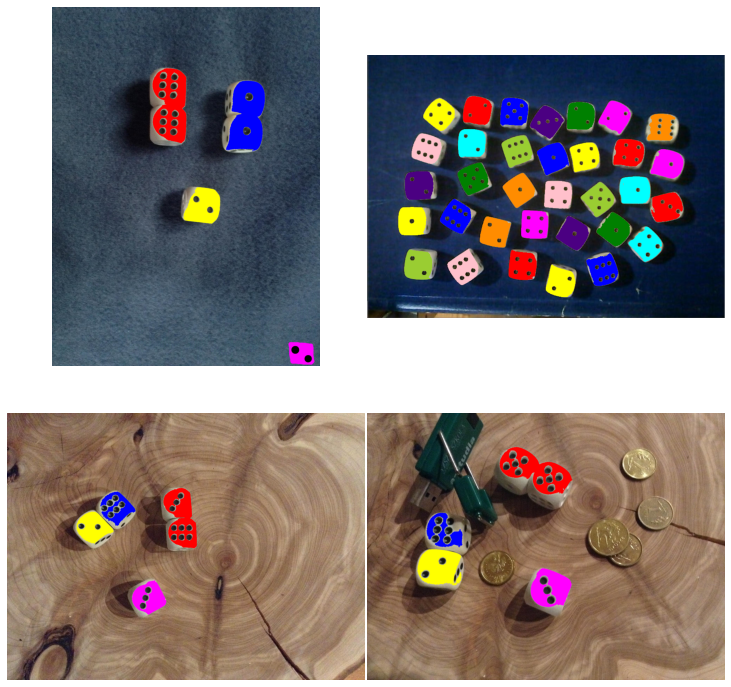

In [113]:
def MakeRegions(imgPom):
    labelImg , n = measure.label(imgPom,return_num = True,connectivity = 2)
    print(n)
    return(labelImg , n)

imgLn = [MakeRegions(i) for i in imgT]

def ShowRegions(i):
    labels = ski.img_as_ubyte(color.label2rgb(imgLn[i][0], bg_label=0))
    regions = measure.regionprops(imgLn[i][0])
    imgTemp = img[i]
    imgTemp[imgLn[i][0] > 0] = labels[imgLn[i][0] > 0]
    return imgTemp 
    
temp  = [ShowRegions(i) for i in range(numberOfImgs)]

show(temp)


obraz [0 1 2 3 4]
ilość kostek 2
6
6
ilość kostek 2
1
1
2
2
obraz [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33]
2
5
4
2
2
3
3
2
6
6
4
1
4
1
5
2
1
1
4
5
2
6
1
4
1
1
2
4
6
2
4
6
2
obraz [0 1 2 3 4]
ilość kostek 2
3
6
3
2
3
obraz [0 1 2 3 4]
ilość kostek 2
5
5
1
2
3


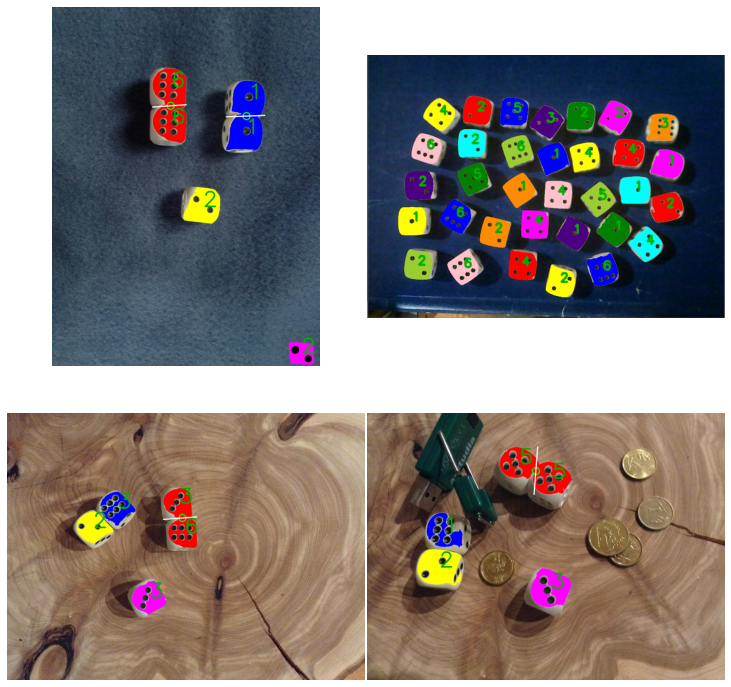

In [115]:
font = cv2.FONT_HERSHEY_SIMPLEX
def printNumberOfDots(n, region , img):
    if(n>1):
        print(n-1)
        y=int(region.centroid[0])
        x=int(region.centroid[1])
        #print("czcionka? ",max(img.shape)//500)
        cv2.putText(img, str(n-1), (x,y), font, max(img.shape)//500, (0, 175, 0), max(img.shape)//250, cv2.LINE_AA)
def ReadDie(labelImg , N , j):
    print("obraz",np.unique(labelImg))
    regions = measure.regionprops(labelImg)
    areasOfRegions = [r.area for r in regions]
    medianOfRegionsArea = np.median(areasOfRegions)
    #print("maediana" ,medianOfRegionsArea )
    imgToRead = img[j]
    neigh = np.ones((imgToRead.shape[0]//120,imgToRead.shape[1]//120))
    for i in range(1,N+1):
        if(regions[i-1].area < 1.2 *  medianOfRegionsArea):
            imgPom = (labelImg == i)
            
            imgPom = ski.morphology.binary_dilation(imgPom,neigh)
            #imgPom = ski.morphology.binary_dilation(imgPom)
            #io.imshow(imgPom,cmap="gray")
            #print("area " , regions[i-1].area)

            #imgPom = 1-imgPom
            x, n = measure.label(imgPom,background=True,return_num = True,connectivity = 2)
            #print("n " , n)
            #xr = measure.regionprops(x)
            printNumberOfDots(n,regions[i-1],imgToRead)
        else:
            imgPom = (labelImg == i)
            minRow = regions[i-1].bbox[0]
            maxRow = regions[i-1].bbox[2]-1
            minCol=regions[i-1].bbox[1]
            maxCol=regions[i-1].bbox[3]-1
            #print("sklejone\t row col")
            #print("punkt z min row ",regions[i-1].bbox[0] , np.argmax(imgPom[regions[i-1].bbox[0]]))
            #print("punkt z min col ", np.argmax(imgPom[:,regions[i-1].bbox[1]]),regions[i-1].bbox[1])
            #print("punkt z max row ",regions[i-1].bbox[2]-1 , np.argmax(imgPom[regions[i-1].bbox[2]-1]))
            #print("punkt z max col ", np.argmax(imgPom[:,regions[i-1].bbox[3]-1]),regions[i-1].bbox[3]-1 )
            #wyliczanie prostej przecinającej na pół dwie stykające się kostki leżące poziomo
            if((maxCol-minCol) > (maxRow - minRow)):
                x1=minCol
                x2=maxCol

                y1=np.argmax(imgPom[:,minCol])
                y2=np.argmax(imgPom[:,maxCol])




                #if(abs(y1-minRow) > abs(y1-maxRow)):#punkt z min col jest bliżej punkty (minCol , maxRow)
                #    y2 = (minRow+y2)/2
                #    y1 = (maxRow+y1)/2
                #else:
                #    y1 = (minRow + y1)/2
                #    y2 = (maxRow+y2)/2

                y1 = (minRow + maxRow + y1)/3
                y2 = (minRow + maxRow + y2)/3


                xSrodkowy = (x1+x2)/2
                ySrodkowy = (y1+y2)/2

                a = (x1 - x2)/(y1-y2)*(-1)
                b = ySrodkowy - a*xSrodkowy



                colOfminRow = abs(int((minRow - b)/a))
                colOfmaxRow = abs(int((maxRow - b)/a))


                cv2.circle(imgToRead , (int(xSrodkowy),int(ySrodkowy)), 20,(0,255,0) , 5)
                cv2.line(imgToRead , (colOfminRow,minRow),(colOfmaxRow,maxRow),(255,255,255) , 5)
                imgPom =ski.img_as_ubyte(imgPom)
                cv2.line(imgPom , (colOfminRow,minRow),(colOfmaxRow,maxRow),0 , 5)
                
            else:
                y1 = minRow
                y2 = maxRow
                x1 = np.argmax(imgPom[minRow,:])
                x2 = np.argmax(imgPom[maxRow,:])
                
                x1 = (minCol + maxCol + x1)/3
                x2 = (minCol + maxCol + x2)/3
                
                xSrodkowy = (x1+x2)/2
                ySrodkowy = (y1+y2)/2

                a = (x1 - x2)/(y1-y2)*(-1)
                b = ySrodkowy - a*xSrodkowy
                
                rowOfminCol = abs(int(a*minCol + b))
                rowOfmaxCol = abs(int(a*maxCol + b))
                
                cv2.circle(imgToRead , (int(xSrodkowy),int(ySrodkowy)), 20,(0,255,0) , 5)
                cv2.line(imgToRead , (minCol,rowOfminCol),(maxCol,rowOfmaxCol),(255,255,255) , 5)
                imgPom =ski.img_as_ubyte(imgPom)
                cv2.line(imgPom , (minCol,rowOfminCol),(maxCol,rowOfmaxCol),0 , 5)
                
                
            newImgPom, n = measure.label(imgPom,background=False,return_num = True,connectivity = 2)
            print("ilość kostek" , n)
            sepDiceRegions = ski.measure.regionprops(newImgPom)
            for label in range(1,n+1):
                sepDiceImg = (newImgPom == label)

                
                sepDiceImg = ski.morphology.binary_dilation(sepDiceImg,neigh)

                x, numberOfDots = measure.label(sepDiceImg,background=True,return_num = True,connectivity = 2)
                printNumberOfDots(numberOfDots,sepDiceRegions[label-1],imgToRead)
           
        
    return imgToRead
        
imgRead = [ReadDie(imgLn[i][0] , imgLn[i][1] , i) for i in range(numberOfImgs)]        
show(imgRead)        

    

In [93]:
test = np.array([[1,2,3],
       [6,4,5]])
test2 = test[:,1]
print(test.shape)

(2, 3)
